# Prerequisite Libraries 
1. sudo python3 -m pip install pandas
2. sudo python3 -m pip install numpy
3. sudo python3 -m pip install matplotlib
4. sudo python3 -m pip install seaborn
5.sudo python3 -m pip install sklearn

## Include the Required Libraries for Analysis

In [59]:
%matplotlib inline

In [60]:
import matplotlib.pyplot as plt

In [61]:
import matplotlib

In [62]:
import numpy as np

In [63]:
import seaborn as sns

In [64]:
import sklearn as kl

In [65]:
import pandas as pd

### Load Energy Usage 2010 thru Panadas
* [Energy Usage](https://data.lacity.org/api/views/nxs9-385f/rows.csv?accessType=DOWNLOAD)

In [66]:
df = pd.read_csv('Energy_Usage_2010.csv')

In [67]:
df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [68]:
df.shape

(67051, 73)

In [69]:
len(df)

67051

In [70]:
len(df.columns)

73

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67051 entries, 0 to 67050
Data columns (total 73 columns):
COMMUNITY AREA NAME                    67051 non-null object
CENSUS BLOCK                           66974 non-null float64
BUILDING TYPE                          66974 non-null object
BUILDING_SUBTYPE                       66974 non-null object
KWH JANUARY 2010                       66180 non-null float64
KWH FEBRUARY 2010                      66180 non-null float64
KWH MARCH 2010                         66180 non-null float64
KWH APRIL 2010                         66180 non-null float64
KWH MAY 2010                           66180 non-null float64
KWH JUNE 2010                          66180 non-null float64
KWH JULY 2010                          66180 non-null float64
KWH AUGUST 2010                        66180 non-null float64
KWH SEPTEMBER 2010                     66180 non-null float64
KWH OCTOBER 2010                       66180 non-null float64
KWH NOVEMBER 2010         

In [72]:
df['BUILDING TYPE'].unique()

array(['Residential', 'Commercial', 'Industrial', nan], dtype=object)

In [73]:
df_res = df.loc[df['BUILDING TYPE'] == 'Residential']

In [74]:
print ("Num Total Rows:", len(df))
print ("Num Residential Total:", len(df_res))
print ("Diff:", (len(df) - len(df_res)))

Num Total Rows: 67051
Num Residential Total: 49747
Diff: 17304


The data frame also has lot of columns

For this excersise will use the below columns:

* COMMUNITY AREA NAME
* BUILDING_SUBTYPE
* TOTAL KWH
* TOTAL THERMS
* TOTAL POPULATION
* TOTAL UNITS
* AVERAGE BUILDING AGE
* AVERAGE HOUSESIZE

### Project on the above columns

In [75]:
df_res = df_res[['COMMUNITY AREA NAME', 'BUILDING_SUBTYPE', 'TOTAL KWH', 'TOTAL THERMS', 'TOTAL POPULATION', 'TOTAL UNITS','AVERAGE BUILDING AGE','AVERAGE HOUSESIZE']]

In [76]:
df_res.shape

(49747, 8)

In [77]:
df_res.to_csv('Energy_Usage_2010_residential.csv')

In [78]:
df_res = pd.read_csv('Energy_Usage_2010_residential.csv', index_col=0)

In [79]:
df = df_res.copy()

In [80]:
df.shape

(49747, 8)

In [81]:
df.count()

COMMUNITY AREA NAME     49747
BUILDING_SUBTYPE        49747
TOTAL KWH               49447
TOTAL THERMS            49314
TOTAL POPULATION        49740
TOTAL UNITS             49740
AVERAGE BUILDING AGE    49747
AVERAGE HOUSESIZE       49740
dtype: int64

In [82]:
df.head()

,COMMUNITY AREA NAME,BUILDING_SUBTYPE,TOTAL KWH,TOTAL THERMS,TOTAL POPULATION,TOTAL UNITS,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE
0,Archer Heights,Multi < 7,NaN,10917.0,89.0,24.0,71.33,3.87
1,Ashburn,Multi 7+,82064.0,NaN,112.0,67.0,41.00,1.81
8,Austin,Multi 7+,41497.0,NaN,79.0,31.0,99.00,2.93
9,Austin,Multi 7+,8596.0,NaN,84.0,33.0,99.00,3.82
10,Austin,Multi < 7,11529.0,NaN,0.0,0.0,0.00,0.00


In [83]:
# df = df.fillna(0.0)

In [84]:
# df.dropna()

### Perform Basic Statistics on Data (Residential)


In [85]:
df['TOTAL KWH'].describe()

count    4.944700e+04
mean     8.422961e+04
std      1.014753e+05
min      1.990000e+02
25%      3.275600e+04
50%      6.625600e+04
75%      1.150085e+05
max      6.910340e+06
Name: TOTAL KWH, dtype: float64

In [86]:
df.describe()

,TOTAL KWH,TOTAL THERMS,TOTAL POPULATION,TOTAL UNITS,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE
count,4.944700e+04,49314.000000,49740.000000,49740.000000,49747.000000,49740.000000
mean,8.422961e+04,14094.016912,78.974930,33.697326,77.606139,2.871123
std,1.014753e+05,13000.373821,72.313111,42.992560,28.873362,0.905074
min,1.990000e+02,25.000000,0.000000,0.000000,0.000000,0.000000
25%,3.275600e+04,5845.000000,39.000000,15.000000,59.820000,2.300000
50%,6.625600e+04,11528.500000,63.000000,24.000000,82.750000,2.820000
75%,1.150085e+05,18933.000000,99.000000,39.000000,97.935000,3.410000
max,6.910340e+06,469402.000000,1496.000000,1165.000000,158.000000,9.000000


In [87]:
df[['BUILDING_SUBTYPE', 'COMMUNITY AREA NAME']].describe()

,BUILDING_SUBTYPE,COMMUNITY AREA NAME
count,49747,49747
unique,3,77
top,Single Family,Austin
freq,26365,1974


### Energy Consumption Questions


1. What was the average energy consumption for Residential Buildings broken down by building subtype in 2010?
2. What was the pre capita energy consumption for all residential buildings?
3. Which community areas were responsible for the highest and lowest per capita enrgy consumption in 2010?

#### 1. What was the average energy consumption for Residential Buildings broken down by building subtype in 2010?

In [88]:
df.groupby('BUILDING_SUBTYPE')['TOTAL KWH'].mean()

BUILDING_SUBTYPE
Multi 7+         91514.626168
Multi < 7        73163.252475
Single Family    92054.643986
Name: TOTAL KWH, dtype: float64

#### 2. What was the pre capita energy consumption for all residential buildings?

In [89]:
df_clean = df.loc[(df['TOTAL KWH'] > 0.0) & (df['TOTAL POPULATION'] > 0.0)].copy()
(df_clean['TOTAL KWH'] / df_clean['TOTAL POPULATION']).mean()

1559.3785933292504

#### 3. Which community areas were responsible for the highest and lowest per capita enrgy consumption in 2010?

In [90]:
df_clean['PER CAPITA KWH'] = df_clean['TOTAL KWH'] / df_clean['TOTAL POPULATION']

In [91]:
df_area = df_clean.groupby('COMMUNITY AREA NAME').mean().sort_values('PER CAPITA KWH')

In [92]:
df_area['PER CAPITA KWH'].head()

COMMUNITY AREA NAME
South Lawndale     879.729961
Rogers Park        890.929917
Hermosa            898.199922
Hyde Park          910.466411
Washington Park    926.569809
Name: PER CAPITA KWH, dtype: float64

In [93]:
df_area['PER CAPITA KWH'].tail()

COMMUNITY AREA NAME
Beverly            3148.019975
Forest Glen        3283.083691
Mount Greenwood    3338.745531
Loop               4537.652717
Near South Side    7243.388328
Name: PER CAPITA KWH, dtype: float64

# Visualize Data using matplotlib

[Matplotlib Website](https://matplotlib.org)

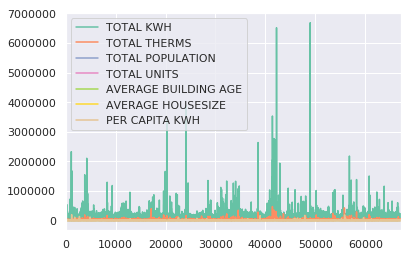

In [94]:
df_clean.plot()

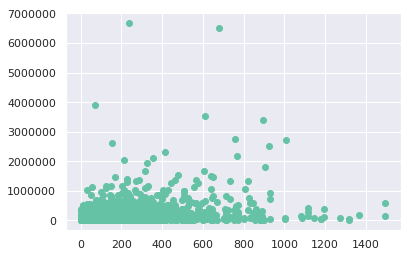

In [95]:
plt.scatter(df_clean['TOTAL POPULATION'], df_clean['TOTAL KWH'])

In [96]:
use_by_subtype = df[['BUILDING_SUBTYPE', 'TOTAL KWH']].groupby('BUILDING_SUBTYPE').mean()

In [97]:
use_by_subtype

,TOTAL KWH
BUILDING_SUBTYPE,
Multi 7+,91514.626168
Multi < 7,73163.252475
Single Family,92054.643986


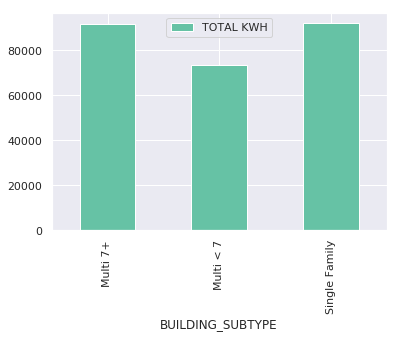

In [98]:
use_by_subtype.plot.bar()

# SeaBorn

In [99]:
sns.set()

In [100]:
sns.set_palette(sns.color_palette("Set2", 10))

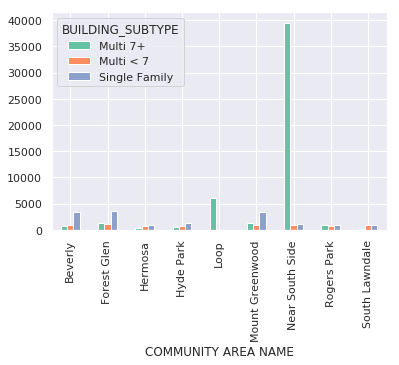

In [101]:
double_group = df_clean[df_clean['COMMUNITY AREA NAME'].isin(
[
    'South Lawndale',
    'Rogers Park',
    'Hermosa',
    'Hyde Park',
    'Beverly',
    'Forest Glen',
    'Mount Greenwood',
    'Loop',
    'Near South Side'   
]
)].groupby(['COMMUNITY AREA NAME', 'BUILDING_SUBTYPE'])['PER CAPITA KWH'].mean()
gif = double_group.unstack()
gif.plot.bar()